# Simulations d'écoulements de Poiseuille pour de l'eau

Auteur: Clément BARDET (30 juillet 2024)
#### $\textit{Adimensionnement d'un problème} \\ \textit{Lien entre valeurs simulées et valeurs réelles} \\ \textit{Choix de valeurs simulées}$

## Importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

## Cadre

Valeurs physiques:
$ \text{Longueur: } L=10^{-3} m \\
\text{Densité: }  \rho=10^3  kg/m^3 \\
\text{Viscosité cinématique: } \nu = 10^{-6}  m^2/s \\
\text{Gravité: } g = 10  m/s^2\\ $

Solution analytique d'un écoulement de Poiseuille
$$u_x (y) = u_{\text{max}} \big( 1- \frac{4y^2}{L^2} \big)$$
avec $u_{\text{max}} = \frac{gL^2}{8 \nu}= 1,25 m.s^{-1}$

On a $Re = \frac{u_{\text{max}} L}{\nu} = 1250$.

In [2]:
L = 1e-3
nu = 1e-6
g=10
Re = 1250
u_max = g * L**2 / (8*nu)

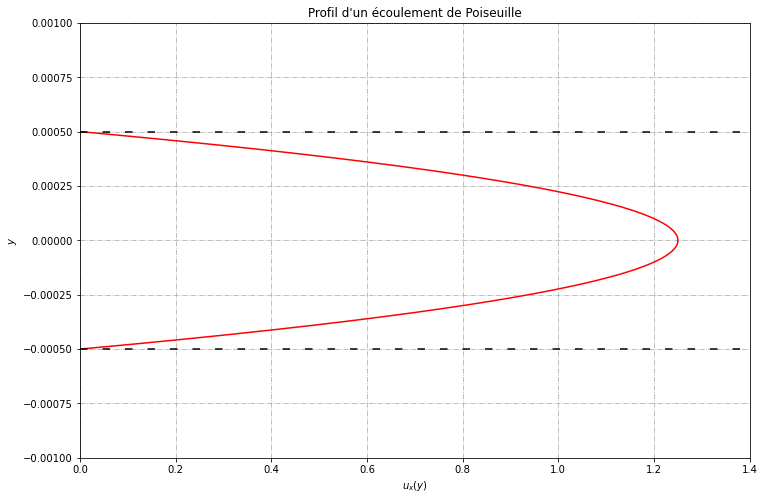

## Données de simulation

On impose:

$\delta x = 10^{-5} \\ \tau = 0.55 \\ \delta x^* = \delta t^* =1$

On utilise les relations suivantes afin de déterminer les valeurs $*$ à simuler:

$\nu = \frac{1}{3} \frac{\delta x^2}{\delta t} (\tau -0.5) \\ \frac {L^*}{\delta x^*} = \frac{L}{\delta x} \\ g^* \frac{\delta t^{*2}}{\delta x^*} = g \frac{\delta t^2}{\delta x} \\ \nu^* = \frac{1}{3}(\tau -0.5)$

In [3]:
dx = 1e-5
tau = 0.55
dx_star = 1
dt_star = 1

L_star = dx_star *L/dx
nu_star = 1/3 * (tau - 0.5)
dt = nu_star / nu * dx**2
g_star = g* dt**2 /dx

u_max_star = nu_star * Re / L_star

print("dx         = ", dx, " m")
print("dt         = ", dt, " s")
print("dx_star    = ", dx_star)
print("dt_star    = ", dt_star)
print("tau        = ", tau)
print("L_star     = ", L_star)
print("nu_star    = ", nu_star)
print("g_star     = ", g_star)
print("u_max_star = ", u_max_star )

dx         =  1e-05  m
dt         =  1.6666666666666686e-06  s
dx_star    =  1
dt_star    =  1
tau        =  0.55
L_star     =  100.0
nu_star    =  0.01666666666666668
g_star     =  2.777777777777784e-06
u_max_star =  0.2083333333333335


## Résultats de simulation

temps de simulation : $409,915 s$.

temps final $T_{f}^{*} = 1 000 000$.

temps final simulé:
$ T_{f} = \frac{\delta t T_{f}^{*}}{\delta t^{*}}$

In [4]:
T_f_star = 1000000
T_f = dt * T_f_star/ dt_star
print("T_f = ", T_f, "s")

T_f =  1.6666666666666685 s


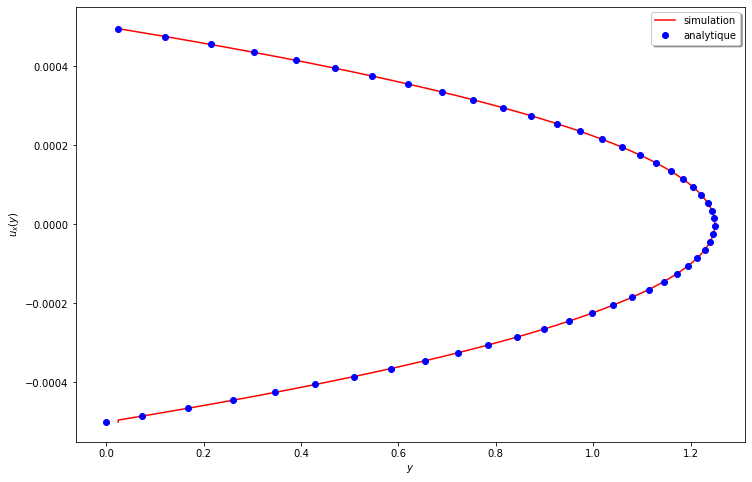

In [5]:
u_star=np.array([])
x_star=np.array([])

with open('Poiseuille_Water.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        if row[0]!= 'laplaphi':
            x_star = np.append(x_star, float(row[22]))
            u_star = np.append(u_star, float(row[7]))

x = dx*x_star
u = dx/dt * u_star
u_analytique = u_max- u_max*4*(x*x)/(L*L) 

fig,ax = plt.subplots()
fig.set_size_inches(12,8, forward = True)
l1, = ax.plot( u,x, color= 'r')
l2, = ax.plot(u_analytique,x, linestyle= "None",marker = 'o', markerfacecolor = 'blue', markeredgecolor='blue', markevery= 2)

ax.legend( (l1,l2), ('simulation','analytique'), loc= 'upper right', shadow = True)

ax.set_xlabel('$y$')
ax.set_ylabel('$u_x(y)$')
plt.show()
